#### Abstract

In this portfolio we want to create two different *classifier Deep Learning models*, *Fully Connected (FC)* and *Convolutional Neural Network (CNN)*. We will use *Sequential method *to create *FC* model and  *Functional API* for the *CNN model*. This model will be used to recognise hand written digits in images. To train our models we want to use *MNIST* database. Then we want to compare them and finding out that using Convolutional Layers instead of Fully Connected in our model and changing some parameters like optimization how much can be effective for creating a better model.<br>

#### Choosing the model  idea

Choosing which type of neural network we are going to use is normally depends on database we have access to:
After finding out some information about our database, then it is time to choose which type of neural network and what architcture is suitable for that database to use.<br> 
In this portfolio we are using MNIST dataset to train our.<br>
The MNIST database of handwritten digits has been a benchmark in Computer Vision for many years. Although it is considered "solved" by many today, new algorithms are still tested on it first, and it still serves as a good learning tool. 
More information on MNIST :
> http://yann.lecun.com/exdb/mnist/

Below we can see some type Neural Network Architecture and their usages:<br>

- Fully Connected(FC): Normally we use them for one dimensions datasets, like Signals and Vectors. 
- Auto Encoder(AE): Normally we use them for one dimensions datasets, like Signals and Vectors.
- Generative adversarial networks(GAN) 
- Recurrent neural network(RNN): Normally they used for datasets which depend on time, like Video, Voice, Text. 
- Convolutional neural network(CNN): Normally they used for more than one dimensions datasets, like Images and Tensors.

This is just normally usage of Neural Network Architecture , It might not be right. For example for images we can also use RNN or RNN + CNN. It depends on how much creativity we have.



Here we want to train our model using mnist dataset.<br>
As we know mnist dataset is 60000 of handwriting 2D images(grayscale)<br>
As it is 2D we can use CNN model, CNN model input can be 2D.<br>
We can also change it to vectore, which is 1D, and use fully connected model.<br>
Mnist dataset consists of four part, train and test images and labels.<br>
So as we have labels for our dataset we can use supervised learning models.<br>
One of the models which we normally use for supervised learning is CNN.<br>

We might can use different type of neural network models in Mnist dataset. Here I want to use FC and CNN models

--------------

## Load the Dataset

First, we need to load the dataset. The dataset we are using is in ```keras.datasets``` package.
We can load the data using ```load_data()``` function.<br>
As the mnist dataset has also labels , we need to make sure to load them as well.

The code below illustrates the output.

In [1]:
from keras.datasets import mnist
import numpy as np
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Looking at the data attribute will give us a good startpoint, and we can see if we need to apply any changes in the dataset to be compatible with the model we want to create .<br>
- Using ```ndim``` command we can see the data dimensions.<br>

- Using ```shape``` command we can see the data shape.<br>

- Using ```dtype``` command we can see the data type.<br>

- Using ```max``` command we can see the max value.<br>

- Using ```min``` command we can see the min value.<br>

In [2]:
# Data attributes
print("train_images:")
print("dimensions: ", train_images.ndim)
print("shape: ", train_images.shape)
print("type: ", train_images.dtype)
print("train_labels shape: ", train_labels.shape )
print()
print("test_images:")
print("dimensions: ", test_images.ndim)
print("shape: ", test_images.shape)
print("type: ", test_images.dtype)
print("test_labels shape: ", test_labels.shape)
print()
print('Image values (min to max):', np.min(train_images), 'to', np.max(train_images))
print('Label values (min to max):', np.min(train_labels), 'to', np.max(train_labels))

train_images:
dimensions:  3
shape:  (60000, 28, 28)
type:  uint8
train_labels shape:  (60000,)

test_images:
dimensions:  3
shape:  (10000, 28, 28)
type:  uint8
test_labels shape:  (10000,)

Image values (min to max): 0 to 255
Label values (min to max): 0 to 9


----------

## FC Neural Network

## Implementation steps

After Loading the data and finiding out which model we are going to create , we need to follow the steps below for creating our model.<br> 

way of creating the model and layers in keras has normally six steps<br>

**Implementation steps:**<br>

  **1. Data preparation (Train/Validation/Test)**<br>
  **2. Creating layers and model**<br>
  **3. Setting training parameters (Loss & optimization functions ,...)**<br>
  **4. Train the model (using fit())**<br>
  **5. Visualization (Plot training behaviour)**<br>
  **6. Evaluation (Evaluate the model on the test set)**<br>

---------

## 1- Data preparation (Train/Validation/Test)


To prepare the data for ```Fully Connected model(FC)```:
- First: We need to change the shape of data:<br>
The mnist dataset is collection of handwriting grayscale images with $28\times28$ pixels dimensions. We need to change them to the vectors, as the pixel values are not suitable for learning with a FC Neural Network model inputs and needs to be vectors. So $28\times28$ images will be $28\times28=784$ vectors.<br>
* Flatten the images into 1D vectors by using NumPy's ```reshape()``` function:
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
- Second: The data needs to be normalised, It means all of them need to be between 0 and 1:<br>
For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. The range of this values from 0 t0 255. Typically zero is taken to be black, and 255 is taken to be white.<br>
So to normalise them we need to divide them to their max value which is 255. Before doing this we need to make sure first to change their type to float as dividing the integers occurs error. one can do this using ```astype('float32')``` finction.  <br>

Then, the data will be ready to input in ```FC``` model.


The code below illustrates the output.

In [3]:
# Reshape
X_train1D = train_images.reshape(60000, 784) # len(X_train1D) = 60000
X_test1D = test_images.reshape(10000, 784)

print("X_train1D shape: ", X_train1D.shape)
print("X_test1D shape: ", X_test1D.shape)

X_train1D shape:  (60000, 784)
X_test1D shape:  (10000, 784)


In [4]:
# Normalise
X_train1D = X_train1D.astype('float32') # changing the types
X_test1D = X_test1D.astype('float32')

X_train1D /= 255
X_test1D /= 255



Now we also need to change our lables and make it compatible with our trained model output.<br>
before changing the label if we open the train lable we can see it has a number for each sample, which it shows the number of that image, but the output in our model is a vector with 10 neurons, and if the model trains good all of these 10 neurons will be closed to zero except that neuron is depends of input index, which is close to one. For example, if the input is image 5 then in output all the neurons are close to zero except 5th neuron which is close to one. So now we need to change the lables to the format of the output of our model. We need to change them to vectors with 10 elements which all the elements are equal to 0, except *nth* element which shows the number *n* is equal to 1. This type of vectors called **One hot vector (Categorical)**, which all the elemnts are equal to zero except one is equal to one. For example, if the input is image 5 then 5th elemnt of the vector should be 1 and rest 0.<br>
For doing this we can use ```np_utils``` library in keras. <br>
 https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical <br>
We need to do this for both train and test lables.

The code below illustrates the output.

In [5]:
import pandas as pd
pd.DataFrame(train_labels)

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [6]:
from keras.utils import np_utils
Y_train1D = np_utils.to_categorical(train_labels)  # One hot vector (Categorical)
Y_test1D = np_utils.to_categorical(test_labels)

In [7]:
pd.DataFrame(Y_train1D)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---------

## 2- Creating layers and model


Now it is time to create our model.
We want to create a fully connected (FC) model that input is X_train1D and compare the output with Y_train1D in train time. Then we can test the result with X_test1D and Y_test1D.<br>

So our model will be like:
- Input Layer is 784 neurons. 
- First Hidden Layer I want to have 500 neurons.
- Second Hidden Layer with 100 neurons
- Output Layer would be 10 neurons.<br>

For creating the model in Keras we can use two different way:<br>
- First: Using ```Sequential model```.
In this type of model we create a Sequential model and then add the layer to the model respectively. This type of models are using from the first and are coventional from the first generation of keras.
- Second: Using ```Functional API``` in kears.
In this type of model we make our layer sepratley in our choice, and then we can choose the direction of the connection between the layers.<br> 
In this type of creating the models we have more felixibility and we can also create the nonconventional models  like the models has more than one input and outputs, or the models has the branches in their paths, like GoogLeNet inception model or U-Net for segmentation.<br>

In this part we want to use simple Sequential model.<br>
For doing this we need to import Sequential model from ```keras.model``` package. Then we need to create our model before adding the layers. To do this we define a variable which is name of our model equal to Sequential(). Here we have ```FCModel = Sequential()```.  <br> 
After creating the model using Sequential model we can add the layers in to the model.<br>

Layers: We have different type of layer which keras supports most of them .For instance some of these layers are Fully Connected, Convonutional , Recurrent and etc . We can also make our own layer and use it in our model. <br>

We want to use simple *Fully Connected* layer in here, which is called ```Dense``` in keras.<br> 
We can import the layers from ```keras.layers``` library in keras.<br>
We can add to our model the layers using ```add()``` function. Here we have ```add(Dense())```<br>
To create Dense Layers we need to define the parameters needed:<br>
First we need to define the number of neurons we want to use in the Dense layers.We want to use **500** for the First Hidden Layer and **100** for the Scond one, also the Output Layer will have **10** neurons.<br> 
Then we need to define the activation function. We want to use ```relu``` function in both Hidden Layers. For Output Layer normally ```softmax``` activation is being used.<br>
Also we need to make sure in Fully connected models (FC) we mention the Input size in creating the **First Hidden Layer**. Which here would be ```input_shape=(784,)```.<br>  

We can also add ```Dropout Layer``` to our model.<br>
Dropout layer is the layer which will be used to drop some of the neurons  by random during training the model. Dropping the neurons means make them zero or make their weights zero so they don't participate in training the model.<br>
It can prevent *over-fitting* and it is also cause of training the models independently as they don't learn from other neuron attitude wich it might happen in FC models.<br>

Deciding whether using the Dropout layer or not in our model it depends on how well our model trained and can it be optimized or is our model is over-fit or not ,how many epochs we are using in our model and etc. We can find this out after the step of fitting our model and compraing it with validation set. So I also explained briefly in that step.<br> 
Over-fitting normally happens when we don't have enough data or when the model is so complicated.<br>
Drop out layer normally used in FC model to reduce the percentage of over-fitting and we can instead train the model with more epochs.<br>
Using Drop out layer will also increase the loss, but sometime this tiny increase in loss and erro is worthy to have no over-fitting<br>

We can see the summary of the model information using the ```summary()``` function.

The code below illustrates the output.

In [8]:
# Creating our model
# Load Library
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
# creating the model
FCModel = Sequential()
FCModel.add(Dense(500, activation='relu', input_shape=(784,))) # Hidden Layer 1
FCModel.add(Dropout(20)) # Dropout Layer
FCModel.add(Dense(100, activation='relu')) # Hidden Layer 2
FCModel.add(Dropout(20)) # Dropout Layer
FCModel.add(Dense(10, activation='softmax')) # Output Layer

In [10]:
FCModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


-------

## 3- Setting training parameters (Loss & optimization functions ,...)

After creating the model we need to compile the model:<br> 
In this step we need to define the other parameters such as **Loss Function** and **Optimization** for the model created. We can do this using ```compile()``` function, which here will be ```FCModel.compile()```<br>

We use *Loss Function* for computing the error that our model may have, then we use *Optimization* algorithm for optimizing the model by modyfing the weights towards Global minimum  that error and making it minimumas much as possible.<br> 

We have different types of *Loss Function* such as **Mean squared , cross- entropy (categorical and binary), Hinge and Softmax** that we can use. Each of these Loss Function use different algorithm for computing the error.<br>
*Optimization* has also different algorithm that we can use such as **SGD (Stochastic Gradient Descent) which is the most famouse one, Momentutum, Adam and etc.**<br> 

Here we define *SGD* as the optimizer of the model and *categorical_crossentropy* for the loss function in the *compile()* function.<br> 
We also define *metrics* to accuracy(acc). By doing this except the error , it also shows us the accuracy of the model during training. So error should go toward zero and accuracy need to go to one or %100. 


The code below illustrates the output.

In [11]:
# Load Library
from keras.optimizers import SGD  # We can also define like 'SGD' without importing
from keras.losses import categorical_crossentropy

In [12]:
#compile the model
FCModel.compile(optimizer=SGD(lr=0.001), loss=categorical_crossentropy, metrics=['acc']) # Lr: learning rate

------

## 4- Train the model (using fit())

In this step we want to train our created model.<br>
For training the model we use ```fit()``` function. In here would be ```FCModel.fit()```.<br>
fit() function has also the parametes which need to be defined.<br>
We need to define *input , output, batchsize, epoch,* ... .<br>
*Input* will be our *X_train1D* which is 60000 of 784 elements vectors, and *output* would be *Y_train1D* which is 10 elements one hot vector.<br>
we define *batch_size* to 128 here for now as we have quite alot data.Normall, as much as the batch size is more our model will have better accuracy.<br>
*epochs* is the number of times that that model will see or use all the datas to train itself. So obviously with more epochs our model will train more, which it does't mean our model would be a good model necessarily.<br>
Too much training the model can cause some problems like ```*overfitting*``` which it means that your model does not learn the data, it memorizes the data.Using more than enough epochs can also be computational expensive. So using enough epochs is important.<br>
We add epochs untill we see the minimum loss function, error, or it goes untill we don't see significant reduction in loss function.<br>
Finding the suitable epochs number to use to train the model is completely empirical and according to trial and error.<br>

Another thing we can do in this part is to split our train dataset to two part of train and validation, Which we can evaluate the model accuracy by validation data and change the parameters as long as we optimize the model.
We can do this with different ways.<br>  
The data might already splitted from the first to train set, test set and validation set, which we can evaluate the validation set using ```evaluate()``` function after training the train set by using fit().<br>
Another way and better way to do is when training the model using ```fit()``` function we can also define the parameter ```validation_split=``` by giving the percentage of validation set we need to split from train set. Here the *validation_split= 0.2*.<br> 
If we already have validation set and we don't need to take from the tran set we need to define ```validation_Data =``` instead of ```validation_split=```, and we will give the data to ```validation_Data =```.<br>

We can place the brief or history of our trained model in a variable by assigning to that variable. In here **network_history** is the history of our trained model in 20 epochs. So we can analyse the model in the next steps.

To see how much it takes to train our model we can use ```datetime()``` function in *datetime* library. We need to set the stat and end before and after fitting our model and subtracting end time from start time will show us the time of the train.
 

The code below illustrates the output.

In [13]:
# Train our model
import datetime
start = datetime.datetime.now()

network_historyFC = FCModel.fit(X_train1D, Y_train1D, batch_size=128, epochs=20, validation_split=0.2)

end = datetime.datetime.now()
elapsed = end - start
print('Total training time: ', str(elapsed))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 110us/step - loss: 2.1978 - acc: 0.2771 - val_loss: 2.0440 - val_acc: 0.4510
Epoch 2/20
48000/48000 [==============================] - 4s 94us/step - loss: 1.9166 - acc: 0.5434 - val_loss: 1.7627 - val_acc: 0.6347
Epoch 3/20
48000/48000 [==============================] - 6s 127us/step - loss: 1.6390 - acc: 0.6735 - val_loss: 1.4782 - val_acc: 0.7323
Epoch 4/20
48000/48000 [==============================] - 6s 131us/step - loss: 1.3733 - acc: 0.7412 - val_loss: 1.2234 - val_acc: 0.7824
Epoch 5/20
48000/48000 [==============================] - 6s 125us/step - loss: 1.1512 - acc: 0.7791 - val_loss: 1.0241 - val_acc: 0.8134
Epoch 6/20
48000/48000 [==============================] - 7s 150us/step - loss: 0.9840 - acc: 0.8015 - val_loss: 0.8790 - val_acc: 0.8294
Epoch 7/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.8625 - acc: 0.8180 - val_loss: 0.7739 - v

#### Comments

As we can see in the top table, not only we have loss(loss) and accuracy(acc) for the train set in each epoch, we aslo have loss(val_loss) and accuracy(val_acc) for the validation set in each epoch. It means in each epoch the data is will train with train set and they have their own loss and accuracy, and then this trained model which is splitted from validation set by itself will use the validation set to test the accuracy and loss of the validation set.<br>


> Total training time:  0:01:56.290826 for 20 epochs with 128 batch size


-------------

## 5- Visualization (Plot training behaviour)

In this step we want to analyse the model to see how the model trained, also check the accuracy and loss function,error, of the model by visualization.<br>

We can do this by using our *network_history* variable defined in previous step and is the history of our trained model in 20 epochs.

*network_history* is a keras object and has a dictionary inside of it which is accessable by ```.history``` command.

We also create the ```plot_history()``` for easier visualisation in our next model.

The code below illustrates the output.

In [14]:
print(type(network_historyFC))
historyFC = network_historyFC.history
print(type(historyFC))
print(historyFC.keys())

<class 'keras.callbacks.callbacks.History'>
<class 'dict'>
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


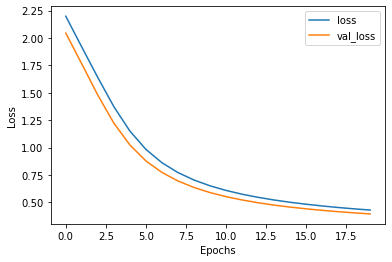

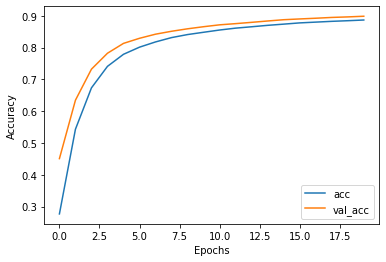

In [15]:
# plot
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['acc']
    val_accuracies = history['val_acc']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure() # creating new figure for second plot
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])
    
plot_history(network_historyFC)    

#### Comments 

As we can see in the top polts, the accuracy and loss for train set and validation set are moving according to each othrs and in a similar way, It means the model trained well until this epoch, 20 in here, and we can add the epochs.<br>

In the Loss plot when the train set plot starts to reduce but val_loss shows the different attitude, that point or intersection is possibly shows that our model is ```over-fit```. To solve the problem we need to stop the epochs in that part or using the technique will prevent overfitting, like using ```Dropout layer```. I added also Dropout layer to my model just for sake of my portfolio however this model with 20 epochs was fine even without Dropout layer. after adding Drop out layer to the model we can cahnge the epochs to more than 20 untill we see the better accuracy and less loss.

--------------------

## 6- Evaluation (Evaluate the model on the test set)

In this step we want to use the trained model with the test set which our model haven't seen this data yet. 
We are doing this to evaluate our model. We can do this using the ```evaluate()``` and ```predict()``` function. In here will me *FCModel.evaluate()* and  *FCModel.predict()*.<br>

In ```evaluate()``` function we need to define input and output. Input is the test set(X_test1D) and the output is the test lable(Y_test1D).<br>
evaluate() function will test set to evaluate the trained model and in out put will give us the loss and accuracy of the test data. so we assing in it to two variable *test_loss* and *test_acc*. which *mean of the loss* will place in the test_loss and *mean of the accuracy* in test_acc.<br>

Using ```predict()``` function we can give to our trained model the test set (X_test1D) and see  the prediction result for the model and how much our trained model is accurate. 

The code below illustrates the output.

In [16]:
# Evaluation
test_loss, test_acc = FCModel.evaluate(X_test1D, Y_test1D)
test_labels_p = FCModel.predict(X_test1D)

10000/10000 [==============================] - 1s 78us/step


In [17]:
print("test_loss: ", test_loss)
print("test_acc: ", test_acc)

test_loss:  0.40140881116390226
test_acc:  0.8966000080108643


#### FC model accuracy and loss

> Total training time:  0:01:56.290826 for 20 epochs with 128 batch size<br>
test_loss:  0.40140881116390226<br>
test_acc:  0.8966000080108643<br>

In [18]:
pd.DataFrame(test_labels_p)

,0,1,2,3,4,5,6,7,8,9
0,0.001265,2.274451e-05,0.001496,0.002675,1.490222e-03,0.002189,0.000067,9.682143e-01,0.002118,0.020462
1,0.035572,6.142009e-03,0.544606,0.039134,1.142442e-04,0.044587,0.298392,2.152265e-04,0.031152,0.000085
2,0.001788,9.133335e-01,0.017013,0.014434,5.016060e-03,0.008742,0.012731,5.068650e-03,0.018458,0.003415
3,0.990868,6.631172e-07,0.000433,0.000206,5.221305e-06,0.005645,0.002072,3.513817e-04,0.000363,0.000057
4,0.004891,4.383656e-04,0.026842,0.003433,7.312564e-01,0.005013,0.013748,4.659428e-02,0.018387,0.149395
...,...,...,...,...,...,...,...,...,...,...
9995,0.000018,1.120319e-05,0.996985,0.001767,1.226706e-06,0.000016,0.000077,5.121946e-05,0.001070,0.000004
9996,0.000419,6.103159e-06,0.002049,0.993274,7.317211e-07,0.003424,0.000024,3.342629e-04,0.000433,0.000036
9997,0.000023,5.045619e-04,0.000429,0.000425,7.935259e-01,0.005396,0.000487,9.955370e-03,0.023424,0.165830
9998,0.019634,1.063714e-01,0.027123,0.017622,3.950846e-02,0.333921,0.043882,3.558687e-02,0.369956,0.006395


#### Comments

As we can see above,This test_labels_p is the prediction number of test set with our FC model. It is a $10\times10000$ matrix which each output has 10 elements and the maximum of each row is the the number of that input. Now if we want to change this to the vector which has only one number for each data and that number is the index of the maximum of that 10 elements, we can use numpy library and ```argmax()``` function.<br>
We need to also define axis, here we need to define axis equal to one which is rows.

The code below illustrates the output.

In [19]:
import numpy as np
test_labels_p = np.argmax(test_labels_p, axis=1)

In [20]:
pd.DataFrame(test_labels_p)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,8


----------------------
>After making the model we can also accsess to the layer separately and modify them. We can do this using ```layers``` parameter we can do this.
We can change the name of the layers by adding the ```name``` parameter and assign it to other name if we want.
We can also stop the layers to be trainable by assigning ```trainable``` parameter to False.

The code below illustrates the output.

In [21]:
# Change layers config
FCModel.layers[0].name = 'Layer_0'
FCModel.layers[0].trainable = False
FCModel.layers[0].get_config()

{'name': 'Layer_0',
 'trainable': False,
 'batch_input_shape': (None, 784),
 'dtype': 'float32',
 'units': 500,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

## CNN Neural Network

In previous part we have seen that how we can create a Fully connected ```FC``` model in ```sequential``` manner.Now I want to creat the model using functional ```API``` and we want to use Convolutional neural network```CNN``` neural network for the same dataset mnist. 


AS after Loading the data and finiding out which model we are going to create , we need to follow the steps below for creating our model.<br> 

way of creating the model and layers in keras has normally six steps<br>

**Implementation steps:**<br>

  **1. Data preparation (Train/Validation/Test)**<br>
  **2. Creating layers and model**<br>
  **3. Setting training parameters (Loss & optimization functions ,...)**<br>
  **4. Train the model (using fit())**<br>
  **5. Visualization (Plot training behaviour)**<br>
  **6. Evaluation (Evaluate the model on the test set)**<br>
  
  -----------

## 1- Data preparation (Train/Validation/Test)

To prepare the data for ```Convolutional neural network(CNN)```:

The difference in here with FC model is that we do not need to change the data to vector anymore and data need to be the images as it is in mnist datset.<br> 
We also have one more dimension in image datasets which is the channel that we need to mention in CNN models, A grayscale image has just one channel, so we need to add 1 in here.<br>

Rest would be the same as FC model Date prepration. 


The code below illustrates the output.

In [22]:
from keras.datasets import mnist

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data attributes
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)
print("train_images type: ", train_images.dtype)

X_train2D = train_images.reshape(60000, 28, 28, 1)
X_test2D = test_images.reshape(10000, 28, 28, 1)

X_train2D = X_train2D.astype('float32')
X_test2D = X_test2D.astype('float32')

X_train2D /= 255
X_test2D /= 255

from keras.utils import np_utils
Y_train1D = np_utils.to_categorical(train_labels)
Y_test1D = np_utils.to_categorical(test_labels)


train_images dimentions:  3
train_images shape:  (60000, 28, 28)
train_images type:  uint8


-------------

## 2. Creating layers and model

Now we want to create the layers.<br>
Before creating the layers we need to import the layers. Here as we are creating the CNN model the layers we need to import would be *```conv2D```* and *```Max pooling```* and *```Input```* or alternatively we can only import layer from keras package and add the layer when we are creating the layer. This also make our code nicer, easier to choose and more readable. 

The difference between *FC* model with sequential method which we have created earlier and *CNN* model with *API* method:
- In *FC* model with sequential method we need to make the model first like *FCModel = Sequential()* and then creating the layers, like we did earlier.
- In *CNN* model using *API* model first we need to creat the layers and then crate the model. So we can choose which layers we want them to be connected. For this reason we have more flexibilty and we can create our own model and use our creativity for creating the neural networks models. We need to make sure to mention the input layer in each layer after creating them in API model.

Creating the Conv2D layers:<br>

By using layer.Conv2D() we can create the convolutional layers for our models. We also need to define the parameters. Below we can see some of the parameters using in Conv2D layers:
- Filter : The number of filter we want to use and we should have in the output.
- Windows size: The size of the window we want to use for convolutional process. 
- Activation: we need to define the activation fuction that we want to use.
- Padding: It means the output of that layer after convolving. If we want to padding the input data and then do the convolutional process which we will not have any data reduction and the output will be the same size of input we need to define padding parameter to *'same'*. If we dont want padding, the output will lose some data and will not have some of the margins, we can define the padding to *'valid'*. 


Creating the MaxPool2D layers:<br>

We use Pooling(Max, Average, ..) layer in order to reduction in data when training our model. We did the same thing for our FC model earlier by adding ```Drop out``` layer. but different process.<br>
By using layer.MaxPool2D() we can create the MaxPool2D layers for our model. We also need to define the ```pool_size = ```. for example ```layers.Maxpool2D(pool_size = 2)(Input layer name)```


After creating the layers and choosing their input:<br>
As we mentioned before we want to create the classifier model, so the output of the model needs to be the vector of 10 neuron to classify the numbers between 0 to 9. In CNN model the output is also an image , so we need to change it to vector with 10 neurons. To do this we can use ```Flatten()``` function.<br>
```Flatten()``` function makes whatever dimension input is to vector. We just need to mention the input layer.<br>


After flattening the output of last CNN layer to  a vector, we also need to input Dense(Fully connected) layer with 10 neuron in here for classification. We can doing this using the ```layers.Dense()``` as we explained earlier <br>



Now it's time to create the models from the layers by using the ```Model()``` function in ```kears.models``` library. The parameters will be Input layer and output layer.<br> 
We can choose the input and output parameters in ```Model()``` function whatever we want. Here we define the input to myInput and output to out_layer. It could also be different, for example it could myInput be the input and conv2 the out put, we just need to make sure our input layer meet the criteria.<br>
So we have a quite a lot flexibility to choose our layer, for example we could make the layer that all their inputs are the same, like the inception model in GoogleNet, Or we could even have many inputs or many outputs and create the different range of models with it

The code below illustrates the output.

In [23]:
# Creating our model
from keras.models import Model
from keras import layers
import keras

myInput = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(16, 3, activation='relu', padding='same')(myInput)
pool1 = layers.MaxPool2D(pool_size = 2)(conv1)
conv2 = layers.Conv2D(32, 3, activation='relu', padding='same')(pool1)
pool2 = layers.MaxPool2D(pool_size = 2)(conv2)
flat = layers.Flatten()(pool2)
out_layer = layers.Dense(10, activation='softmax')(flat)
 

CNNModel = Model(myInput, out_layer)

CNNModel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1569

#### Comments
As you can see above , the number of parameters is less than FC model, In fully connected model we had 443,610 parameters and here in CNN model we have only 20,490.<br>

Now we want to use one of the techniques using in deep learning and convolutional.<br>
The first technique we want to implement is using stride instead of Max pooling layers. We can do this by defining the stride paramere in convolutional layer.<br>
Conv2D layer except filter, window, activation and padding which we defined earlier has another paramether called ```strides```.
We can also define stride in the convolutional layers instead of adding pooling layer to reduce the datas and the volume of computing in our model.

The code below illustrates the output.

In [24]:
# Creating our model
from keras.models import Model
from keras import layers
import keras

myInput = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(16, 3, activation='relu', padding='same', strides=2)(myInput)
conv2 = layers.Conv2D(32, 3, activation='relu', padding='same', strides=2)(conv1)
flat = layers.Flatten()(conv2)
out_layer = layers.Dense(10, activation='softmax')(flat)
 

CNNModel = Model(myInput, out_layer)

CNNModel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


#### Comments
As we can see in the table above , using strides = 2 instead of Max pooling layers result in the same parameters, 20,490, by using less layer in the model. By doing this our model will be lighter, faster and less computing will be done. Now if we want we can even use more convolutional layer in our model.

## 3- Setting training parameters (Loss & optimization functions ,...)

The only difference in this step with our FC model is that we change our optimizer to ```Adam()``` instead of using ```SGD()```. 


The code below illustrates the output.

In [25]:
CNNModel.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['acc'])

--------------

## 4- Train the model (using fit())



The code below illustrates the output.

In [26]:
# Train our model
import datetime
start = datetime.datetime.now()

network_historyCNN = CNNModel.fit(X_train2D, Y_train1D, batch_size=128, epochs=20, validation_split=0.2)

end = datetime.datetime.now()
elapsed = end - start
print('Total training time: ', str(elapsed))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 13s 271us/step - loss: 0.4893 - acc: 0.8653 - val_loss: 0.2131 - val_acc: 0.9400
Epoch 2/20
48000/48000 [==============================] - 12s 254us/step - loss: 0.1713 - acc: 0.9494 - val_loss: 0.1245 - val_acc: 0.9656
Epoch 3/20
48000/48000 [==============================] - 17s 348us/step - loss: 0.1062 - acc: 0.9685 - val_loss: 0.0952 - val_acc: 0.9734
Epoch 4/20
48000/48000 [==============================] - 12s 254us/step - loss: 0.0797 - acc: 0.9765 - val_loss: 0.0874 - val_acc: 0.9754
Epoch 5/20
48000/48000 [==============================] - 17s 348us/step - loss: 0.0671 - acc: 0.9792 - val_loss: 0.0788 - val_acc: 0.9769
Epoch 6/20
48000/48000 [==============================] - 15s 303us/step - loss: 0.0591 - acc: 0.9821 - val_loss: 0.0710 - val_acc: 0.9796
Epoch 7/20
48000/48000 [==============================] - 19s 390us/step - loss: 0.0522 - acc: 0.9838 - val_loss: 0.

#### Comments

As we can see in the above table, by using convolutional layers instead of Fully Connected and also using *Adam()* function instead of *SGD()* are loss in much less than before. This is only because of the capability of Convolution layers and advantage of Adam() function.


> Total training time:  0:04:45.057634 for 20 epochs with 128 batch size.

## 5- Visualization (Plot training behaviour)

To visualize it we can use the ```plot_history()``` function that we have created earlier in our FC model.

The code below illustrates the output.

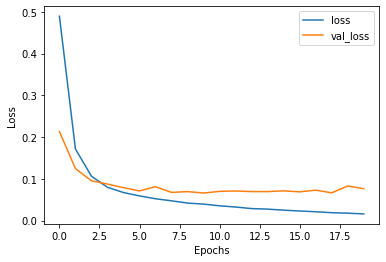

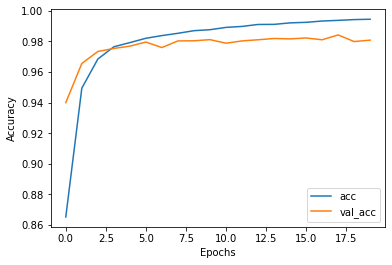

In [27]:
plot_history(network_historyCNN)

## 6- Evaluation (Evaluate the model on the test set)

This step is would be exactly the same as FC model.

The code below illustrates the output.

In [28]:
# Evaluation
test_loss, test_acc = CNNModel.evaluate(X_test2D, Y_test1D)
test_labels_p = CNNModel.predict(X_test2D)

10000/10000 [==============================] - 1s 123us/step


In [29]:
print("test_loss: ", test_loss)
print("test_acc: ", test_acc)

test_loss:  0.06320389996870363
test_acc:  0.9828000068664551


#### CNN model accuracy and loss

> Total training time: 0:04:45.057634 for 20 epochs with 128 batch size.<br>
test_loss:  0.06320389996870363<br>
test_acc:  0.9828000068664551<br>

In [30]:
import numpy as np
test_labels_p = np.argmax(test_labels_p, axis=1)
pd.DataFrame(test_labels_p)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


Table above shows the predicted number for the test sets using CNN model.

---------------------

### Comparision between FC and CNN Neural Network models

Table below is the comparision between two different type of Neural Network models, CNN model and FC model, which we trained using MNIST dataset used to recognise hand written digits in images.<br>
as we can see FC model is faster to train but not as accurate as CNN model.

#### FC model accuracy and loss

> Total training time:  0:01:56.290826 for 20 epochs with 128 batch size<br>
test_loss:  0.40140881116390226<br>
test_acc:  0.8966000080108643<br>



#### CNN model accuracy and loss

> Total training time: 0:04:45.057634 for 20 epochs with 128 batch size.<br>
test_loss:  0.06320389996870363<br>
test_acc:  0.9828000068664551<br>
